In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)
pd.option_context('display.max_rows', 50)

import prepare

In [2]:
# get the data
intakes = pd.read_csv('aac_intakes_20220304.csv')
outcomes = pd.read_csv('aac_outcomes_20220304.csv')

In [3]:
df = prepare.aac_prep(intakes, outcomes)
df = prepare.aac_get_dogs(df)

In [4]:
target = 'outcome_type'

In [5]:
df.head()

,intake_type,intake_condition,animal_type,n_previous_stays,stay_id,outcome_type,month_intake,fixed,sex,breed_mixed,breed_1,color_1,age_intake,found_in_austin,found_in_travis,found_outside_jurisdiction,found_other,is_pitbull,is_black,akc_breed_group
8,Stray,Normal,Dog,0,A664257_0,Adoption,October,False,female,True,Podengo Pequeno,Black,1460 days,False,True,False,False,False,False,Hound
9,Stray,Normal,Dog,0,A664266_0,Transfer,October,False,female,True,Chihuahua Shorthair,Buff,365 days,True,False,False,False,False,False,Toy
14,Owner Surrender,Injured,Dog,0,A651630_0,Adoption,October,True,female,True,Labrador Retriever,Tan,2190 days,False,False,True,False,False,False,Sporting
16,Stray,Normal,Dog,0,A664269_0,Adoption,October,True,male,True,Great Pyrenees,White,730 days,True,False,False,False,False,False,Working
24,Stray,Normal,Dog,0,A664272_0,Transfer,October,True,female,True,Cairn Terrier,Brown,365 days,True,False,False,False,False,False,Terrier


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53507 entries, 8 to 136294
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   intake_type                 53507 non-null  object         
 1   intake_condition            53507 non-null  object         
 2   animal_type                 53507 non-null  object         
 3   n_previous_stays            53507 non-null  int64          
 4   stay_id                     53507 non-null  object         
 5   outcome_type                53507 non-null  object         
 6   month_intake                53507 non-null  object         
 7   fixed                       53507 non-null  object         
 8   sex                         53507 non-null  object         
 9   breed_mixed                 53507 non-null  bool           
 10  breed_1                     53507 non-null  object         
 11  color_1                     53507 non-nu

In [7]:
df.shape

(53507, 20)

### UNIVARIATE

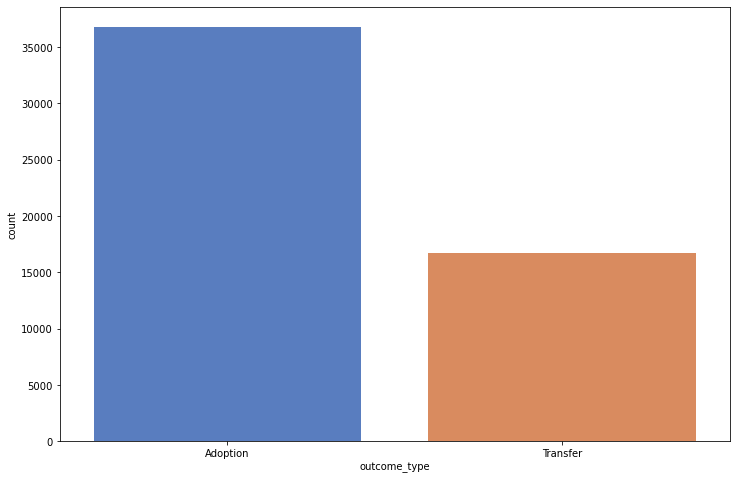

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(df[target], palette='muted')
plt.show()

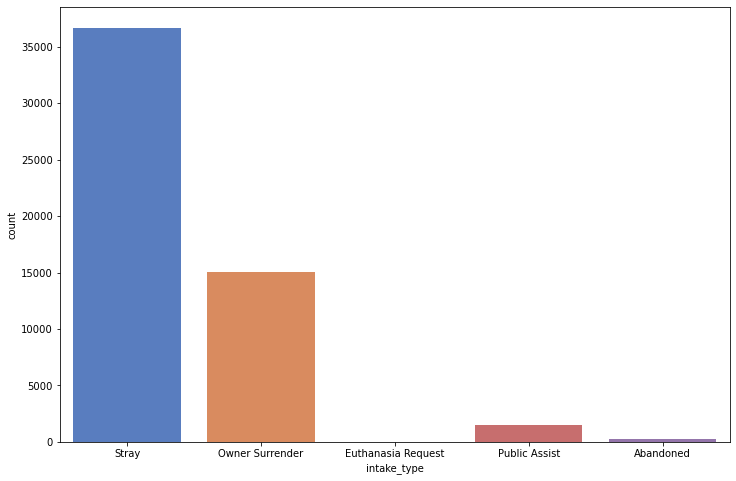

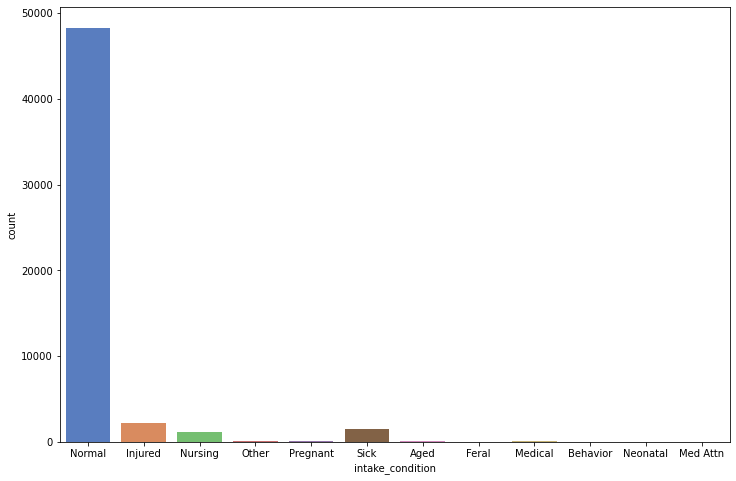

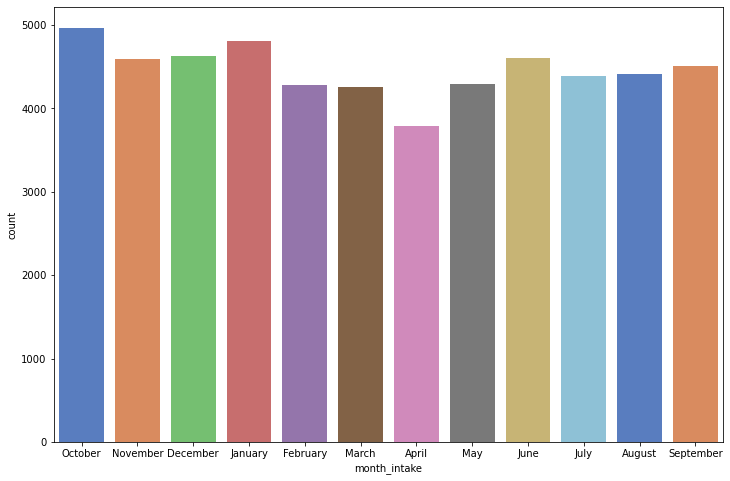

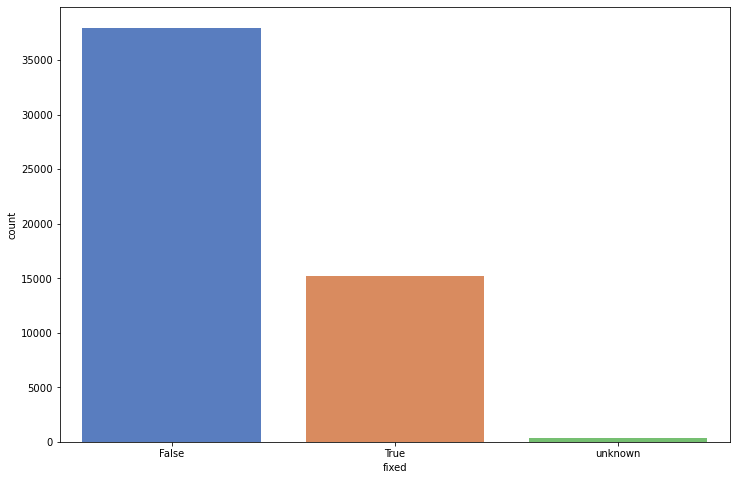

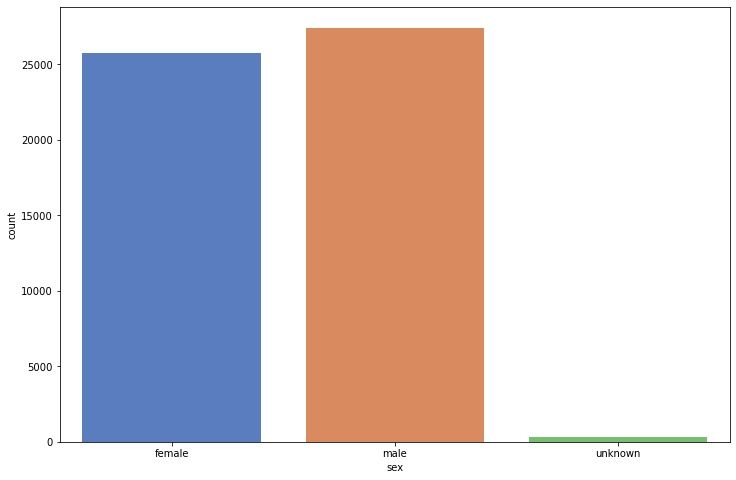

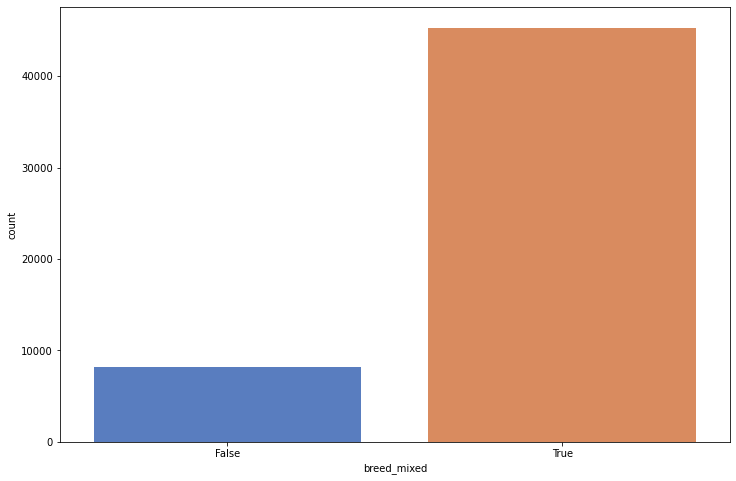

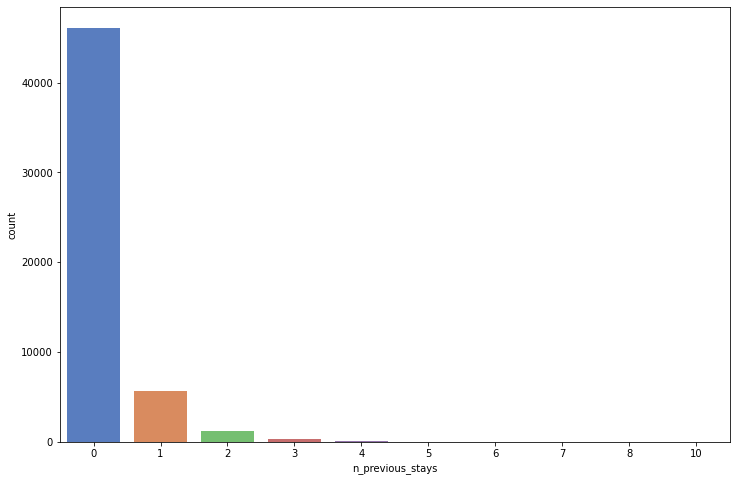

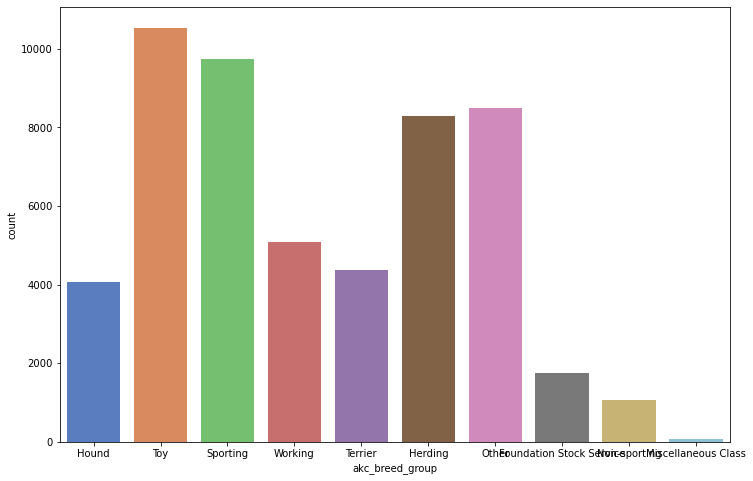

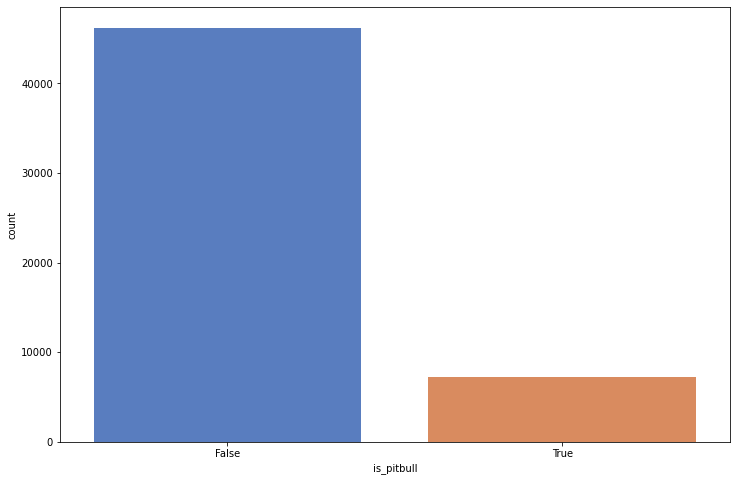

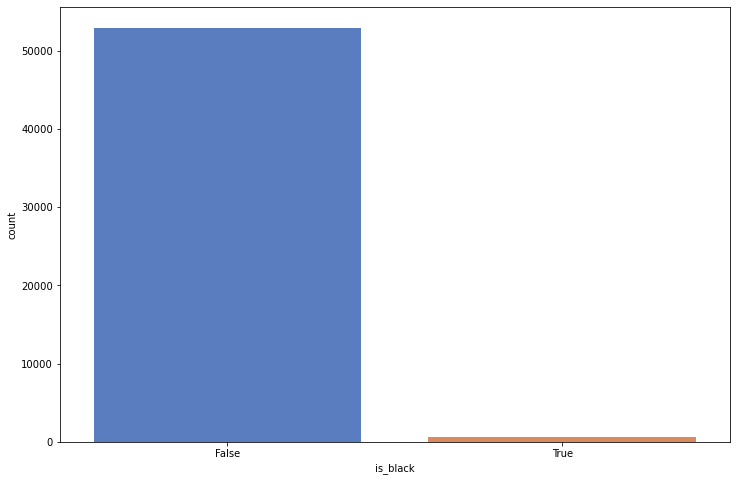

In [9]:
cols = ['intake_type', 'intake_condition', 
        'month_intake', 'fixed', 'sex', 'breed_mixed',
        'n_previous_stays', 'akc_breed_group', 'is_pitbull', 'is_black']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.countplot(df[col], palette='muted')
    plt.show()

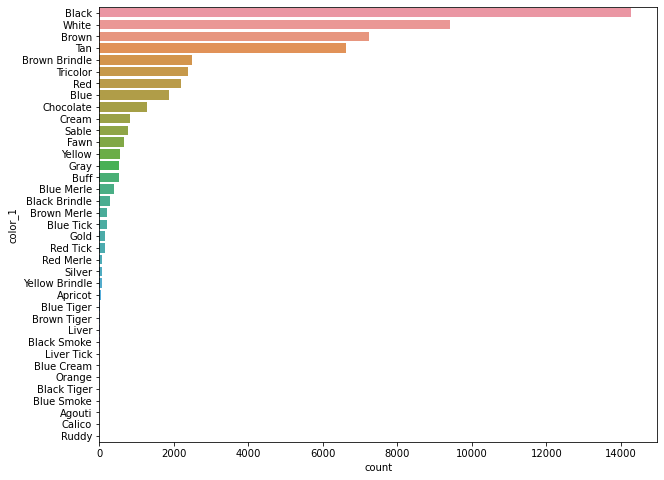

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, y='color_1', 
              order=df['color_1'].value_counts().index)
plt.show()

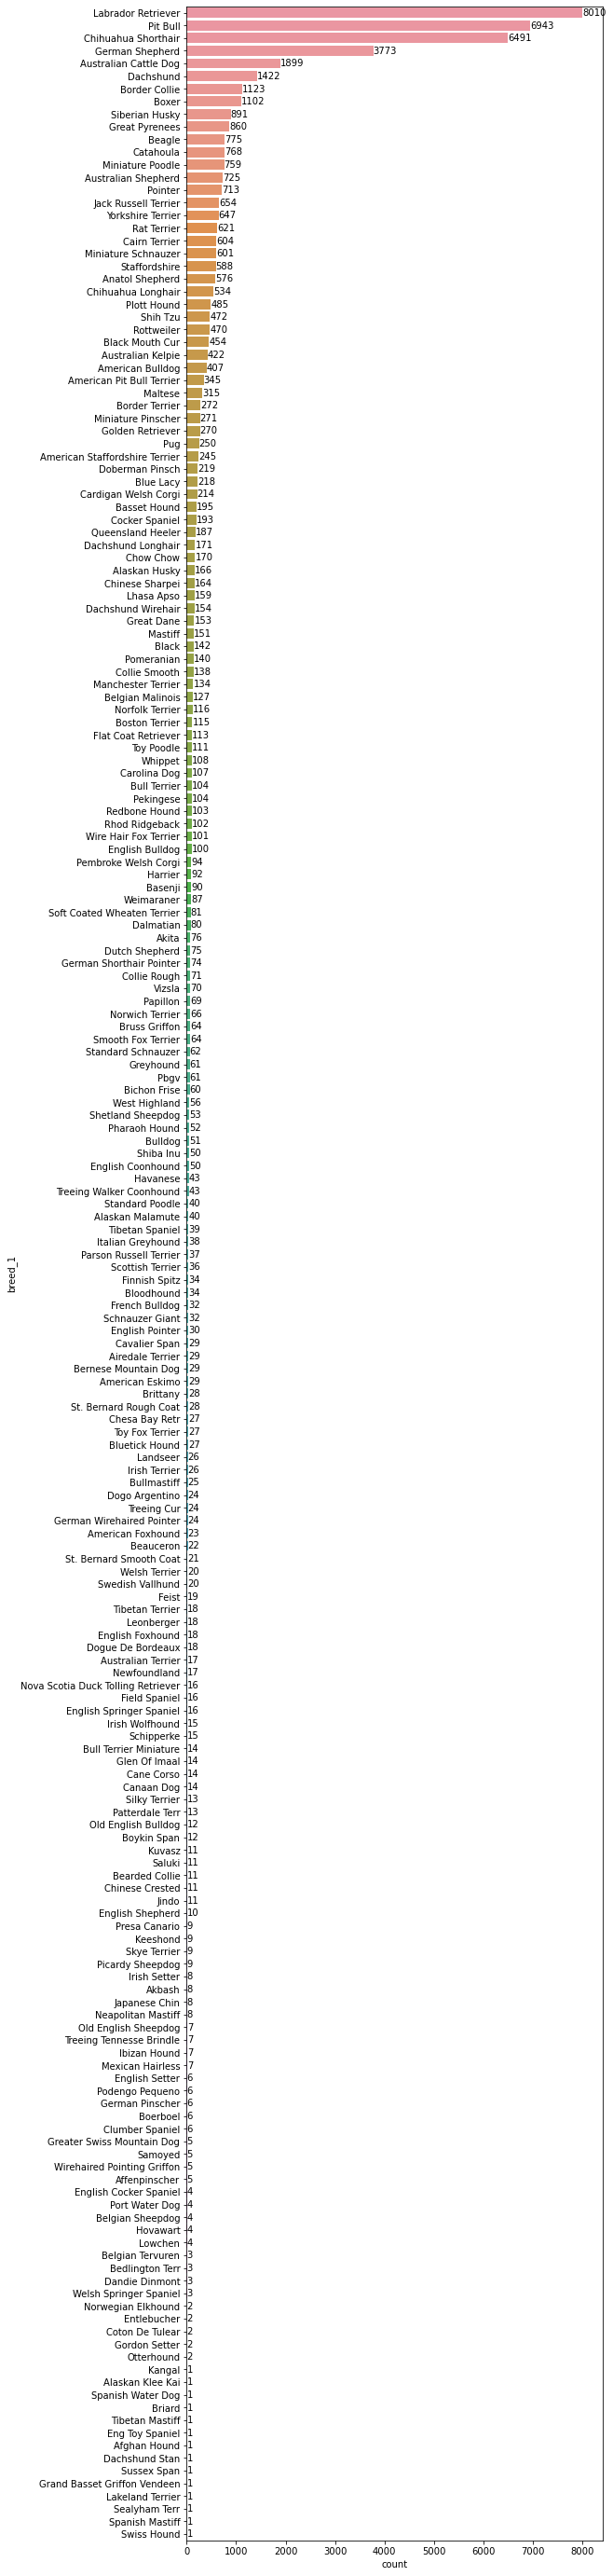

In [11]:
plt.figure(figsize=(8,50))
ax = sns.countplot(data=df, y='breed_1', 
              order=df['breed_1'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)

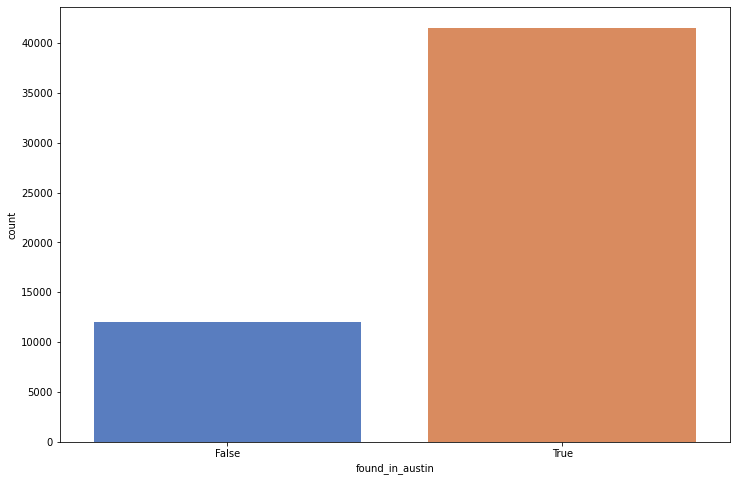

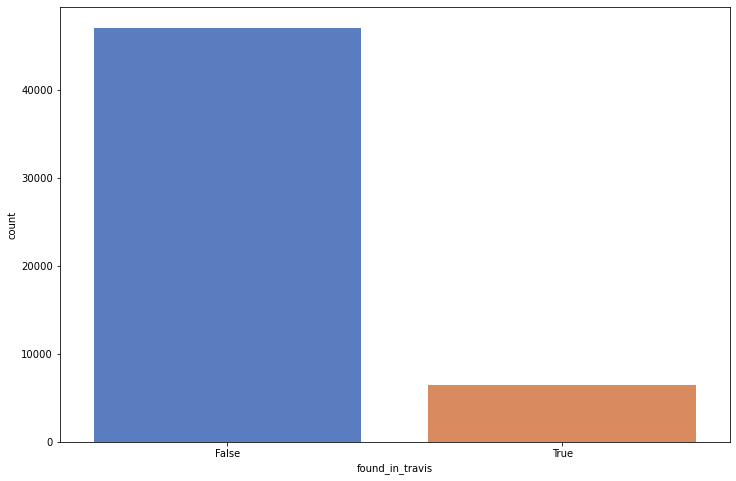

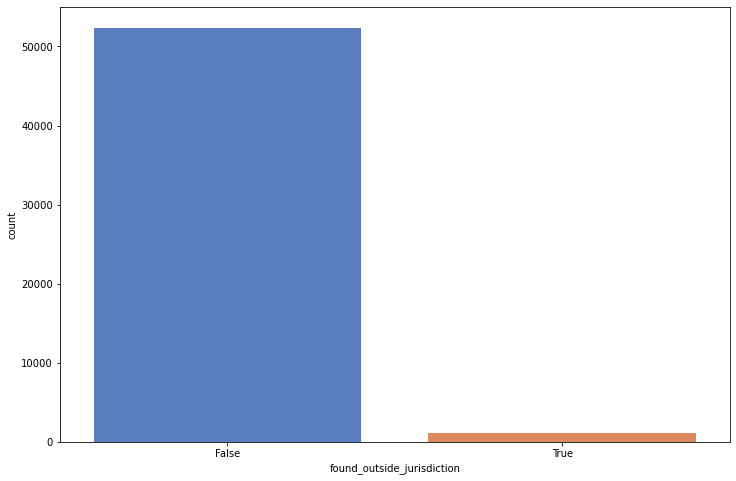

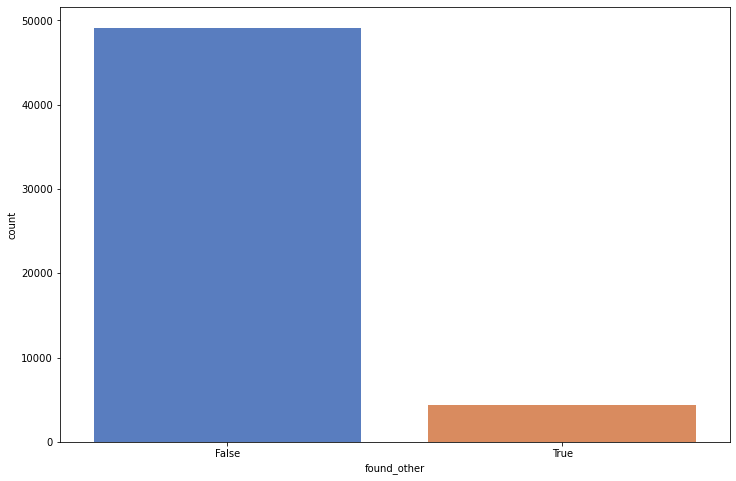

In [12]:
cols = ['found_in_austin', 'found_in_travis', 
        'found_outside_jurisdiction', 'found_other']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.countplot(df[col], palette='muted')
    plt.show()

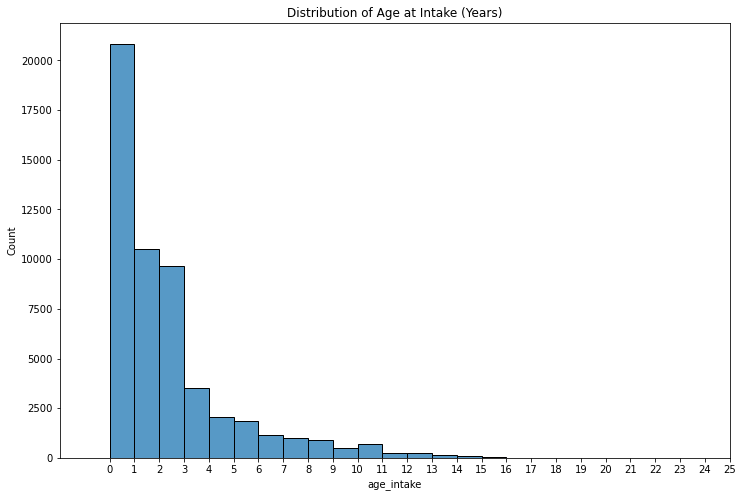

In [13]:
plt.figure(figsize=(12,8))
sns.histplot(df.age_intake / pd.Timedelta(days=1) / 365, bins=20)
plt.xticks(range(26))
plt.title('Distribution of Age at Intake (Years)')
plt.show()

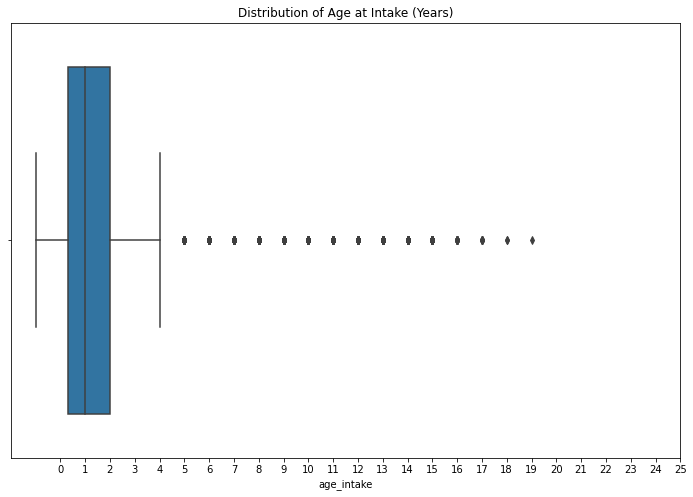

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(df.age_intake / pd.Timedelta(days=1) / 365)
plt.xticks(range(26))
plt.title('Distribution of Age at Intake (Years)')
plt.show()

 seeing considerable outliers for age, we might consider removing them. 

### BIVARIATE

#### Split the data

In [15]:
train, validate, test = prepare.train_validate_test_split(df)

train	 n = 29963
validate n = 12842
test	 n = 10702


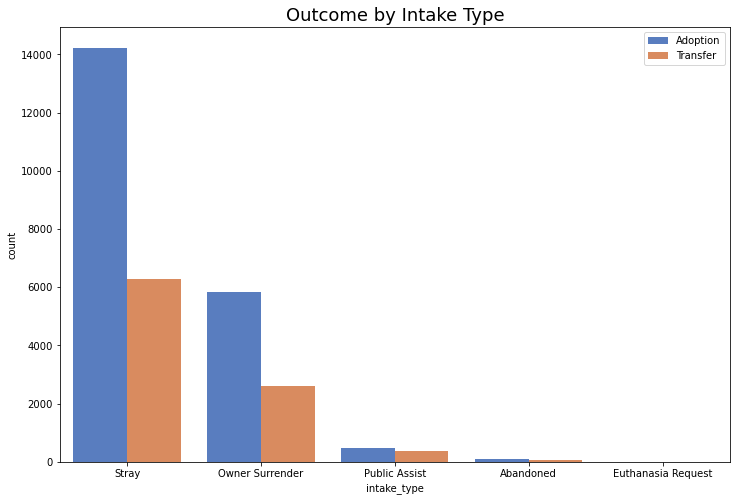

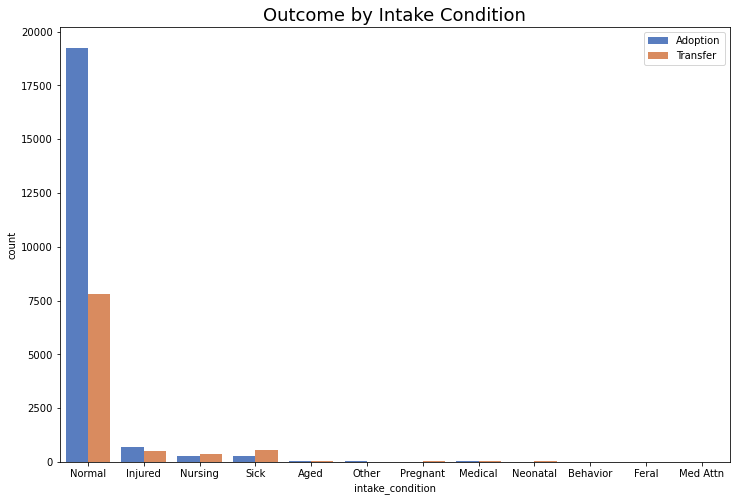

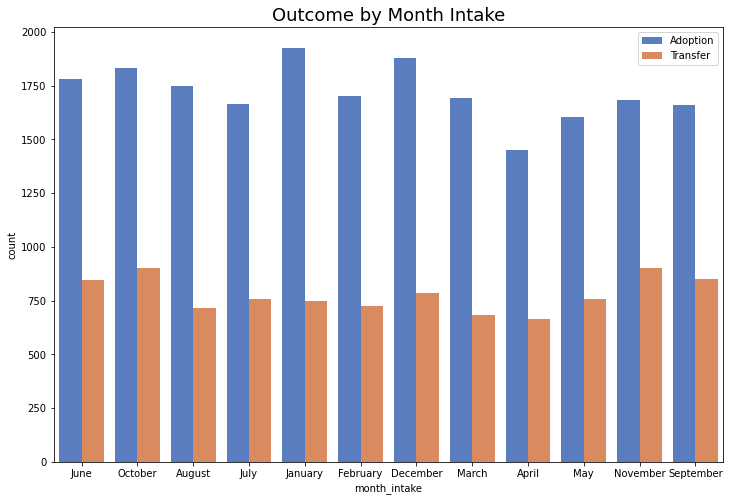

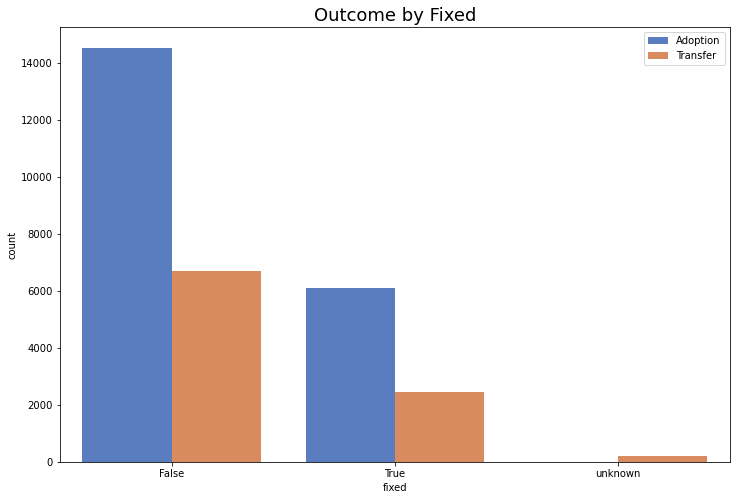

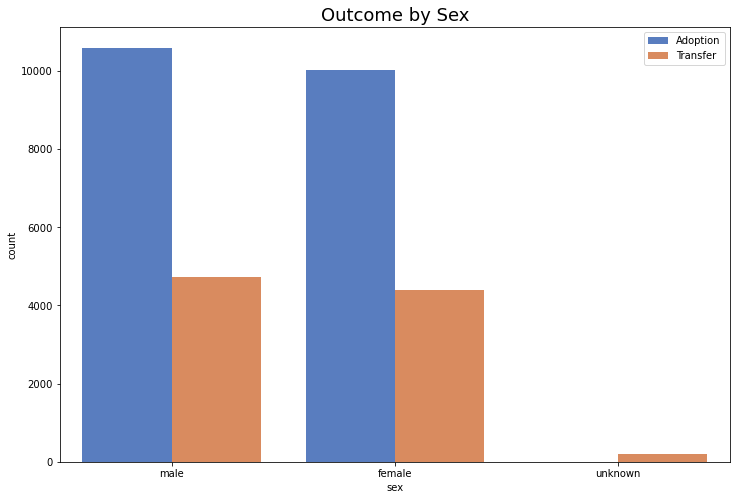

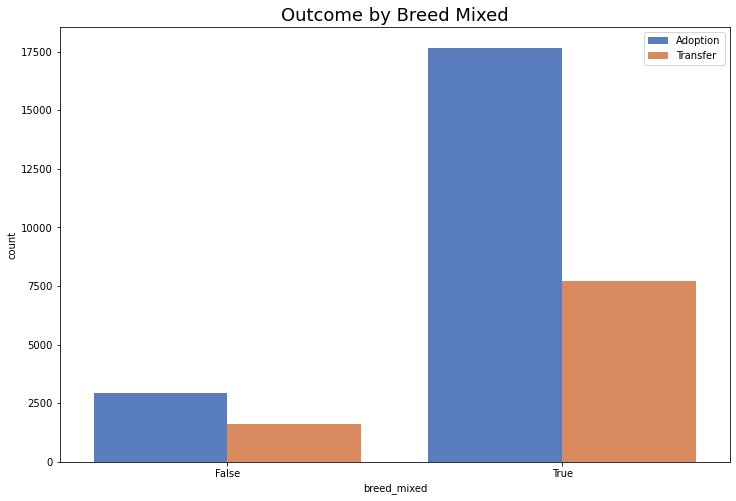

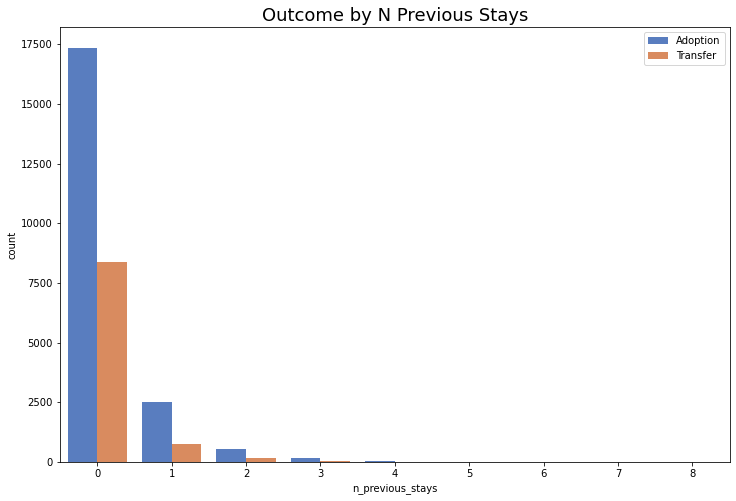

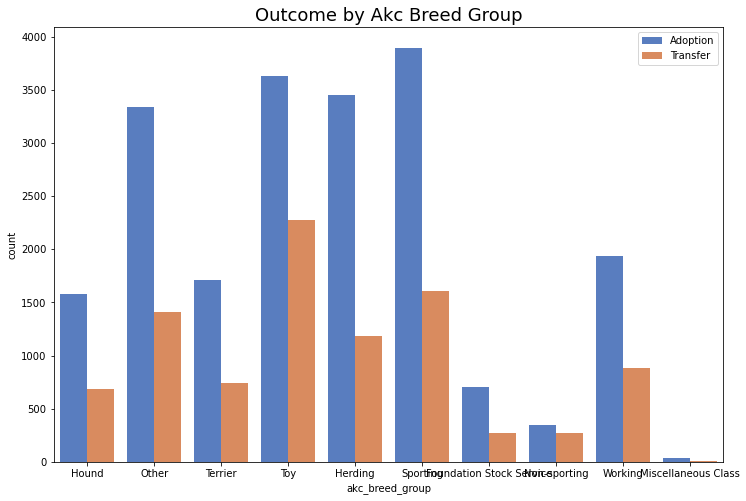

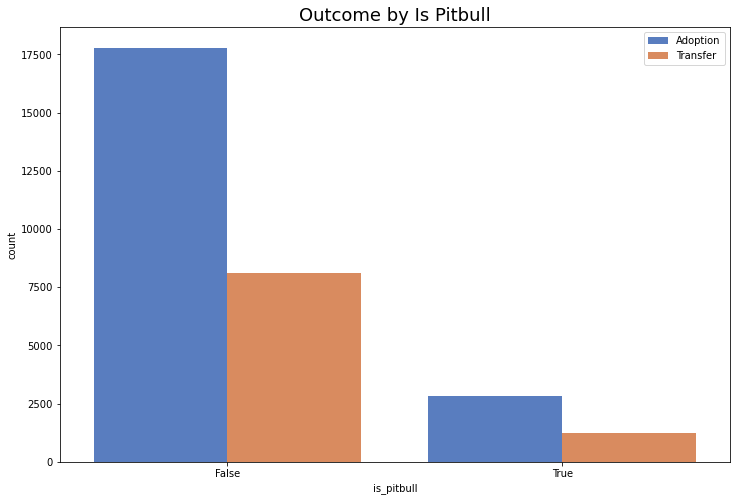

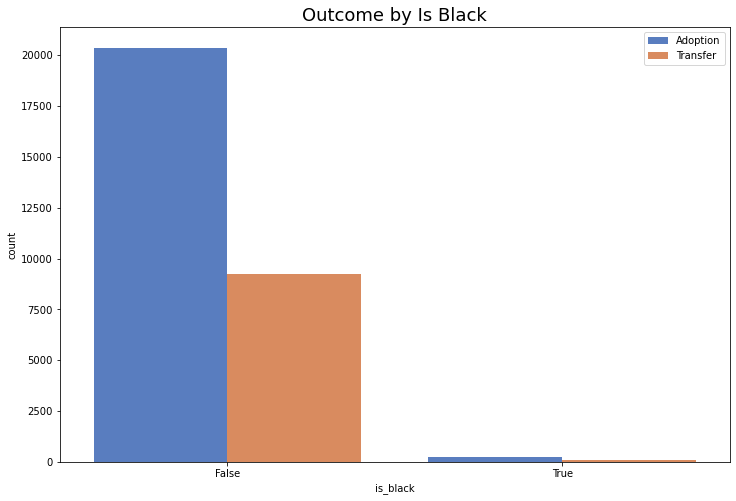

In [16]:
cols = ['intake_type', 'intake_condition', 
        'month_intake', 'fixed', 'sex', 'breed_mixed',
        'n_previous_stays', 'akc_breed_group', 'is_pitbull', 'is_black']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.countplot(data=train, x=col, hue='outcome_type', palette='muted')
    plt.title(f"Outcome by {col.title().replace('_', ' ')}", fontsize=18)
    plt.legend(loc='upper right')
    plt.show()

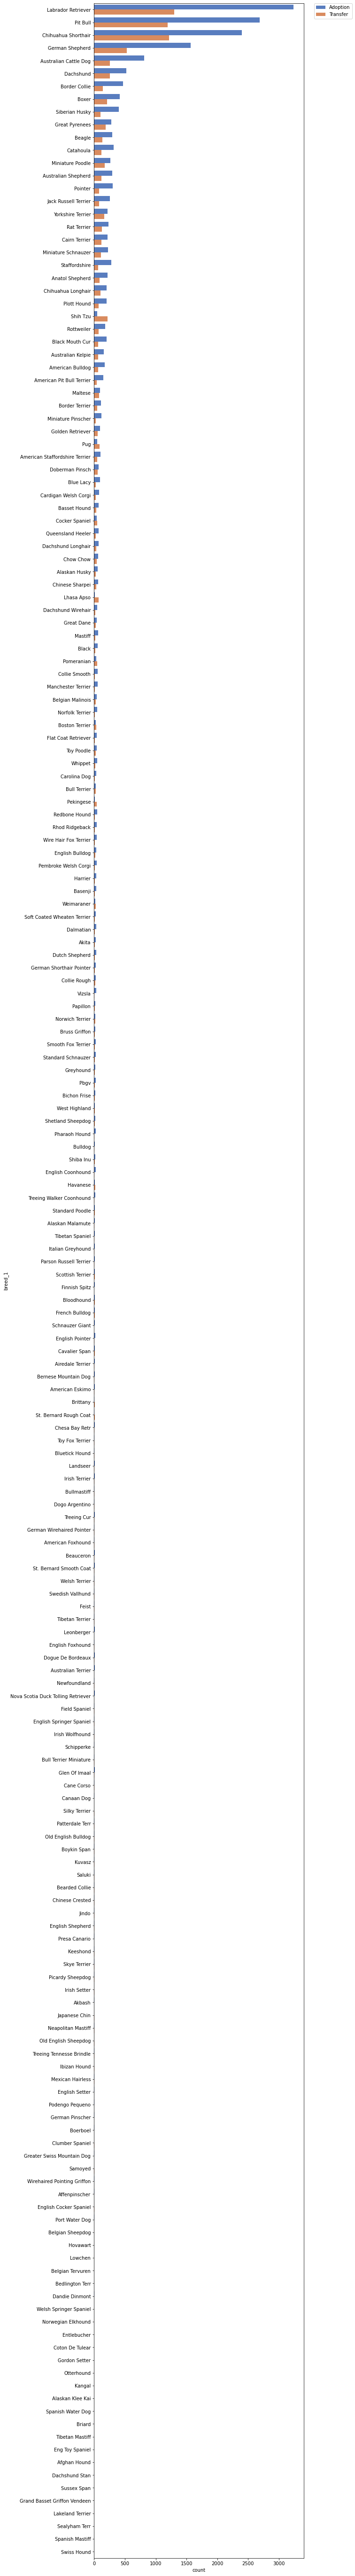

In [17]:
plt.figure(figsize=(8,100))
sns.countplot(data=train, y='breed_1', hue='outcome_type', 
                   order=df['breed_1'].value_counts().index,
                   palette='muted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

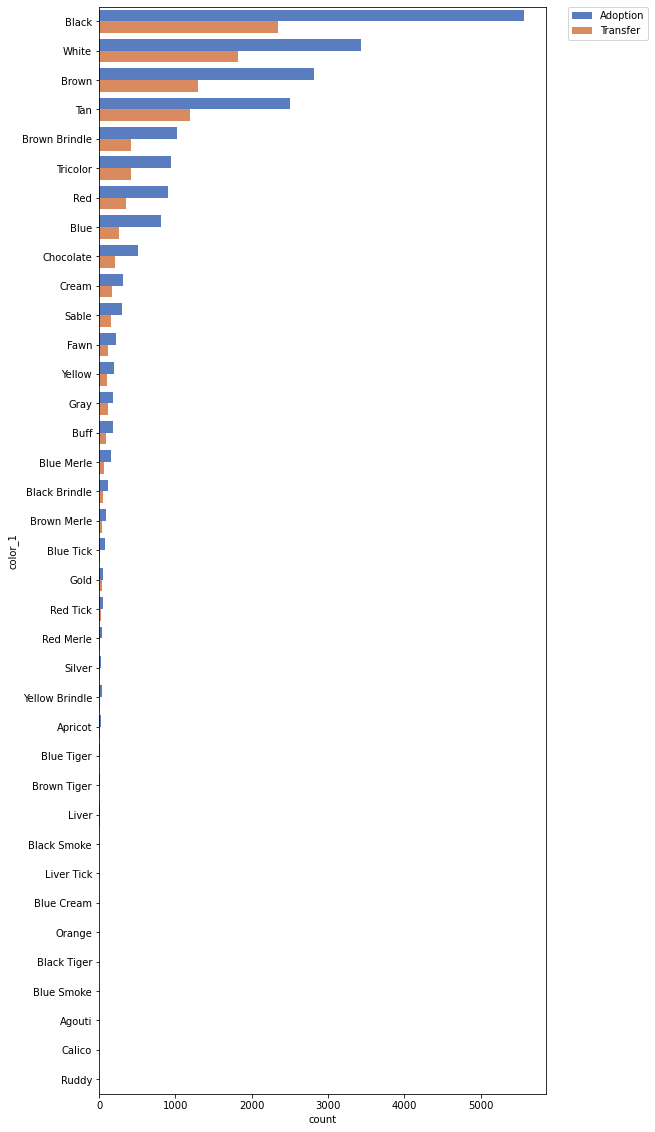

In [18]:
plt.figure(figsize=(8,20))
sns.countplot(data=train, y='color_1', hue='outcome_type', 
                   order=df['color_1'].value_counts().index,
                   palette='muted')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [19]:
train.head()

,intake_type,intake_condition,animal_type,n_previous_stays,stay_id,outcome_type,month_intake,fixed,sex,breed_mixed,breed_1,color_1,age_intake,found_in_austin,found_in_travis,found_outside_jurisdiction,found_other,is_pitbull,is_black,akc_breed_group
66622,Stray,Normal,Dog,0,A751111_0,Adoption,June,False,male,True,Dachshund Wirehair,Cream,365 days,True,False,False,False,False,False,Hound
31819,Owner Surrender,Normal,Dog,1,A704620_1,Adoption,June,True,female,True,Black Mouth Cur,Tan,365 days,False,False,False,True,False,True,Other
55925,Stray,Normal,Dog,0,A736764_0,Transfer,October,False,male,True,Rat Terrier,White,365 days,True,False,False,False,False,False,Terrier
119406,Owner Surrender,Injured,Dog,0,A821355_0,Transfer,August,False,female,False,Chihuahua Shorthair,White,2555 days,True,False,False,False,False,False,Toy
103627,Stray,Normal,Dog,0,A799024_0,Transfer,July,False,female,False,German Shepherd,Black,150 days,True,False,False,False,False,False,Herding


In [20]:
train.intake_condition.value_counts()

Normal      27053
Injured      1187
Sick          818
Nursing       630
Aged          100
Medical        52
Other          41
Pregnant       37
Neonatal       26
Behavior       13
Feral           4
Med Attn        2
Name: intake_condition, dtype: int64

# Further Exploration: Specific Questions

In [23]:
train['adopted'] = np.where((train.outcome_type == 'Adoption'), True, False)

#### Are pit bulls adopted at lower rates than other dogs?

It is a common understanding that pit bull-type dogs are less desirable as pets than other dogs and are adopted from shelters at lower rates. Let's see if this holds true in our data set

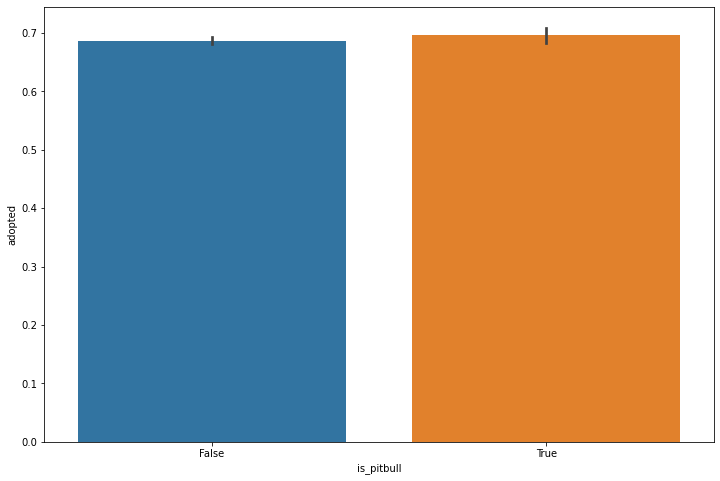

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(data=train, x='is_pitbull', y='adopted')
plt.show()

In [33]:
# Adoption Rate for pitbulls
train[train.is_pitbull].adopted.mean()

0.6964417177914111

In [34]:
# Adoption Rate for other dogs
train[~train.is_pitbull].adopted.mean()

0.6870750927070457

It seems that pitbulls are actually adopted at a similar - even slightly higher - rate than other dogs in Austin. Is this statistically significant?

# [INSERT STATISTICAL TEST HERE]

#### Are black dogs adopted at lower rates than other dogs?

It is a common understanding that black dogs are also adopted from shelters at lower rates than other dogs. Does this hold true in Austin?

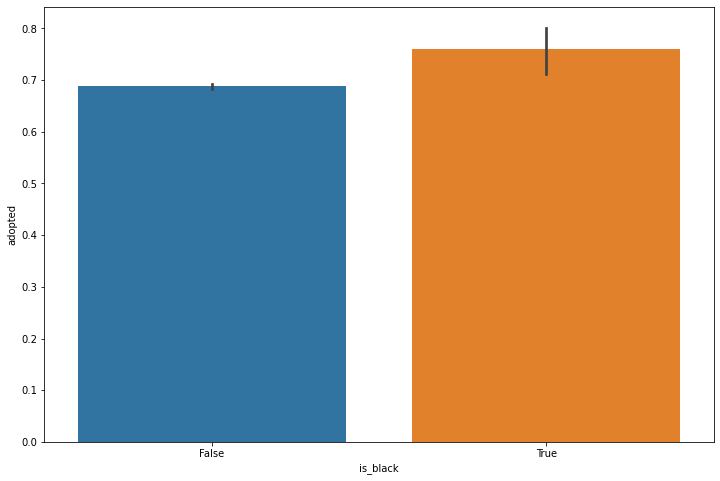

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(data=train, x='is_black', y='adopted')
plt.show()

Again, it seems that the common understanding is false, as black dogs appear to be adopted at higher rates than other dogs in Austin. Is that statistically significant?

# [INSERT STATISTICAL TEST HERE]

#### What differences exist in adoption rates among the AKC breed groups


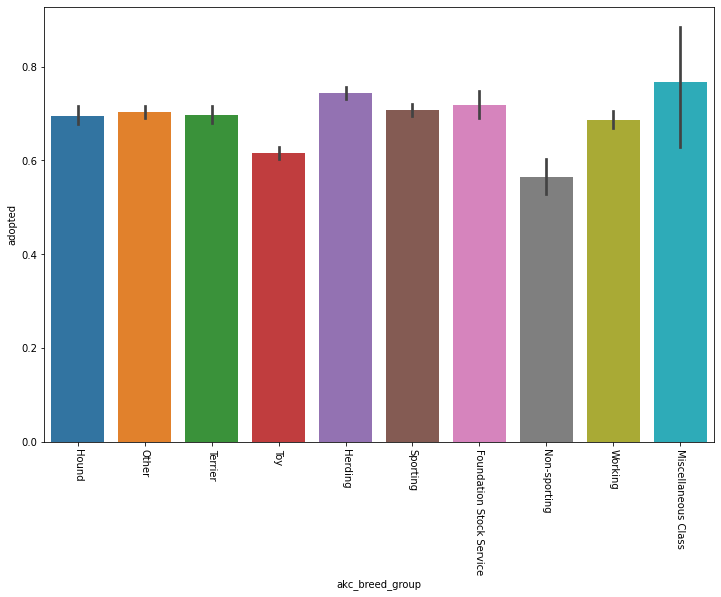

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(data=train, x='akc_breed_group', y='adopted')
plt.xticks(rotation=270)
plt.show()

Adoption rates appear relatively similar among the groups, with exceptions of the Toy Group and the Non-Sporting group, as these appear to be significantly lower. Are these differences significant?

# [INSERT STATISTICAL TEST HERE]

#### How does intake condition affect adoption rate?

In [48]:
train['condition_normal'] = np.where((train.intake_condition == 'Normal'), True, False)

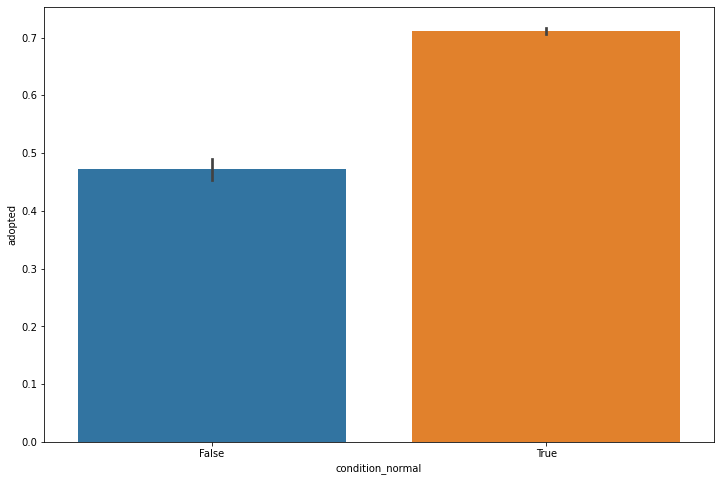

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(data=train, x='condition_normal', y='adopted')
plt.show()

Normal condition dogs appear to be adopted at much higher rates than other dogs, as might be expected. Is this statistically significant?

# [INSERT STATISTICAL TEST HERE]

In [50]:
train

,intake_type,intake_condition,animal_type,n_previous_stays,stay_id,outcome_type,month_intake,fixed,sex,breed_mixed,breed_1,color_1,age_intake,found_in_austin,found_in_travis,found_outside_jurisdiction,found_other,is_pitbull,is_black,akc_breed_group,adopted,condition_normal
66622,Stray,Normal,Dog,0,A751111_0,Adoption,June,False,male,True,Dachshund Wirehair,Cream,365 days,True,False,False,False,False,False,Hound,True,True
31819,Owner Surrender,Normal,Dog,1,A704620_1,Adoption,June,True,female,True,Black Mouth Cur,Tan,365 days,False,False,False,True,False,True,Other,True,True
55925,Stray,Normal,Dog,0,A736764_0,Transfer,October,False,male,True,Rat Terrier,White,365 days,True,False,False,False,False,False,Terrier,False,True
119406,Owner Surrender,Injured,Dog,0,A821355_0,Transfer,August,False,female,False,Chihuahua Shorthair,White,2555 days,True,False,False,False,False,False,Toy,False,False
103627,Stray,Normal,Dog,0,A799024_0,Transfer,July,False,female,False,German Shepherd,Black,150 days,True,False,False,False,False,False,Herding,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131693,Abandoned,Normal,Dog,2,A841751_2,Transfer,September,True,male,True,Pit Bull,Black,150 days,True,False,False,False,True,False,Other,False,True
77083,Stray,Normal,Dog,0,A764950_0,Adoption,January,False,male,True,American Bulldog,Brown,1825 days,True,False,False,False,False,False,Foundation Stock Service,True,True
132984,Stray,Normal,Dog,0,A845449_0,Adoption,October,False,female,False,Australian Cattle Dog,Black,30 days,False,True,False,False,False,False,Herding,True,True
108530,Stray,Nursing,Dog,0,A804948_0,Transfer,September,unknown,unknown,True,Pit Bull,Brown,0 days,True,False,False,False,True,False,Other,False,False


In [51]:
train.intake_condition.unique()

array(['Normal', 'Injured', 'Nursing', 'Sick', 'Aged', 'Other',
       'Pregnant', 'Medical', 'Neonatal', 'Behavior', 'Feral', 'Med Attn'],
      dtype=object)